In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [31]:
pd.set_option('display.max_rows', None)
df = pd.read_csv("INFLUD21-01-05-2023(1).csv", sep=";", dtype=str)



In [32]:
df["TP_IDADE"] = pd.to_numeric(df["TP_IDADE"], errors="coerce")
df["NU_IDADE_N"] = pd.to_numeric(df["NU_IDADE_N"], errors="coerce")

def corrigir_idade(row):
    if row["TP_IDADE"] in [1, 2]:
        return 0
    elif row["TP_IDADE"] == 3:
        return row["NU_IDADE_N"]
    return None

df["IDADE_CORRIGIDA"] = df.apply(corrigir_idade, axis=1)

df[["TP_IDADE", "NU_IDADE_N", "IDADE_CORRIGIDA"]].head()


,TP_IDADE,NU_IDADE_N,IDADE_CORRIGIDA
0,3,69,69
1,3,89,89
2,3,51,51
3,3,57,57
4,3,81,81


# Avaliar características de grávidas e puérperas

Quantidade de grávidas: 558948
Homens no grupo de grávidas: 1709
Quantidade de puérperas: 5349
Homens no grupo de puérperas: 11


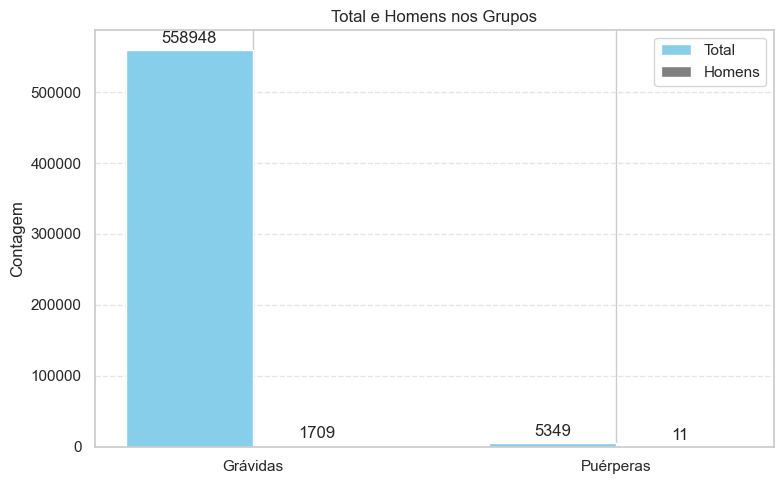

In [44]:
import numpy as np

# Dados
labels = ["Grávidas", "Puérperas"]
totais = [len(gravidas), len(puerperas)]
homens = [len(homens_gravidas), len(homens_puerperas)]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars_total = ax.bar(x - width/2, totais, width, label='Total', color='skyblue')
bars_homens = ax.bar(x + width/2, homens, width, label='Homens', color='gray')

print(f"Quantidade de grávidas: {len(gravidas)}")
print(f"Homens no grupo de grávidas: {len(homens_gravidas)}")

print(f"Quantidade de puérperas: {len(puerperas)}")
print(f"Homens no grupo de puérperas: {len(homens_puerperas)}")

ax.set_ylabel('Contagem')
ax.set_title('Total e Homens nos Grupos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)

for bars in [bars_total, bars_homens]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Taxas de mortalidade nos grupos de grávidas e puérperas

Taxa de mortalidade - Grávidas: 26.42%
Taxa de mortalidade - Puérperas: 14.96%


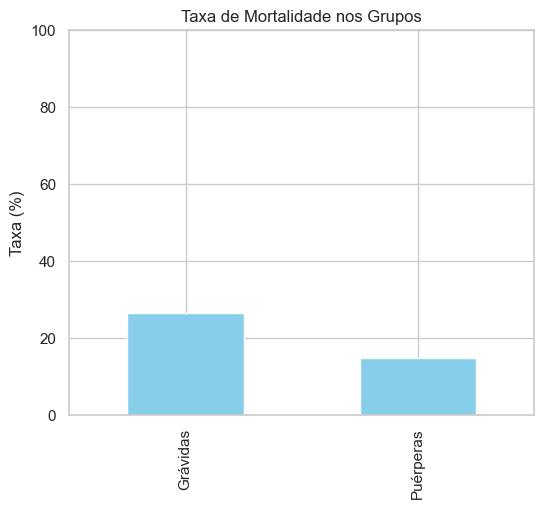

In [34]:

obitos_gravidas = gravidas[gravidas["EVOLUCAO"] == "2"]
obitos_puerperas = puerperas[puerperas["EVOLUCAO"] == "2"]

tx_mortal_gravidas = (len(obitos_gravidas) / len(gravidas)) * 100 if len(gravidas) else 0
tx_mortal_puerperas = (len(obitos_puerperas) / len(puerperas)) * 100 if len(puerperas) else 0

print(f"Taxa de mortalidade - Grávidas: {tx_mortal_gravidas:.2f}%")
print(f"Taxa de mortalidade - Puérperas: {tx_mortal_puerperas:.2f}%")

mortalidade_data = pd.DataFrame({
    "Taxa de Mortalidade (%)": [tx_mortal_gravidas, tx_mortal_puerperas]
}, index=["Grávidas", "Puérperas"])

mortalidade_data.plot(kind="bar", figsize=(6,5), legend=False, color=["skyblue", "salmon"])
plt.title("Taxa de Mortalidade nos Grupos")
plt.ylabel("Taxa (%)")
plt.ylim(0, 100)
plt.show()


# Mortalidade por raça/cor no subgrupo de puérperas

Percentual de mortalidade por raça/cor (puérperas):
CS_RACA
1    15.74
2    21.18
3    17.86
4    13.99
5    25.00
9    13.37
dtype: float64


C:\Users\bebe_\AppData\Local\Temp\ipykernel_2896\862149707.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_mortalidade_raca.index, y=percent_mortalidade_raca.values, palette="viridis")


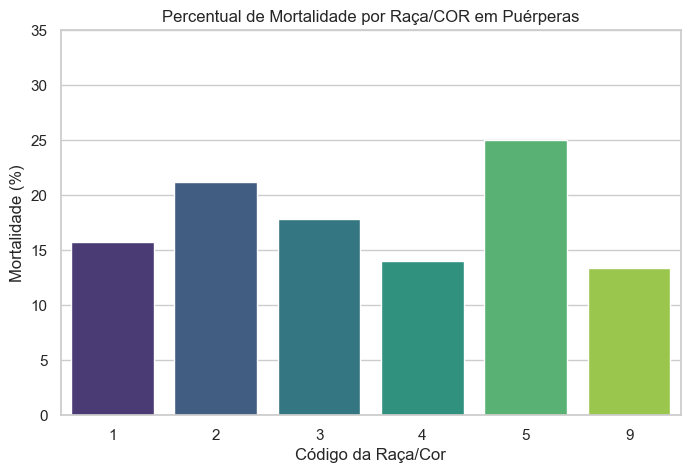

In [35]:
total_puerp_raca = puerperas.groupby("CS_RACA").size()
obitos_puerp_raca = puerperas[puerperas["EVOLUCAO"] == "2"].groupby("CS_RACA").size()

percent_mortalidade_raca = (obitos_puerp_raca / total_puerp_raca * 100).round(2)
print("Percentual de mortalidade por raça/cor (puérperas):")
print(percent_mortalidade_raca)

plt.figure(figsize=(8,5))
sns.barplot(x=percent_mortalidade_raca.index, y=percent_mortalidade_raca.values, palette="viridis")
plt.title("Percentual de Mortalidade por Raça/COR em Puérperas")
plt.xlabel("Código da Raça/Cor")
plt.ylabel("Mortalidade (%)")
plt.ylim(0, percent_mortalidade_raca.max() + 10)
plt.show()

# Taxa de mortalidade por estado

Taxa de mortalidade por estado (SG_UF):
SG_UF
ES    34.54
RR    33.78
AC    31.97
MA    30.91
RN    30.82
GO    30.08
AM    30.08
RS    29.69
RO    29.58
RJ    28.93
PA    27.31
BA    26.15
PB    26.04
MS    25.66
PI    25.63
SP    24.49
MG    24.19
CE    23.78
PR    22.61
SC    22.44
SE    22.08
AP    22.02
AL    21.98
MT    21.68
PE    21.66
DF    21.48
TO    20.32
dtype: float64


C:\Users\bebe_\AppData\Local\Temp\ipykernel_2896\2866480314.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_mortalidade_uf.values, y=taxa_mortalidade_uf.index, palette="rocket")


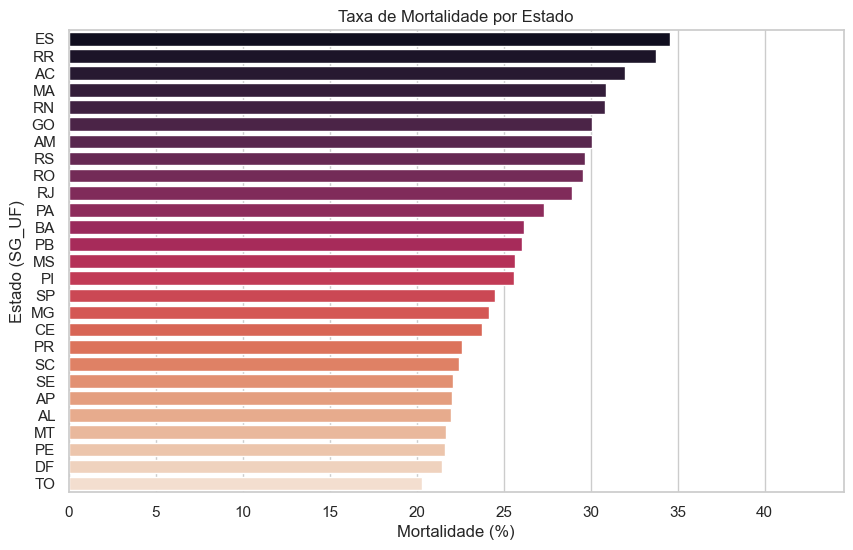

In [36]:
total_uf = df.groupby("SG_UF").size()
obitos_uf = df[df["EVOLUCAO"] == "2"].groupby("SG_UF").size()

taxa_mortalidade_uf = (obitos_uf / total_uf * 100).round(2)
taxa_mortalidade_uf = taxa_mortalidade_uf.sort_values(ascending=False)

print("Taxa de mortalidade por estado (SG_UF):")
print(taxa_mortalidade_uf)

plt.figure(figsize=(10,6))
sns.barplot(x=taxa_mortalidade_uf.values, y=taxa_mortalidade_uf.index, palette="rocket")
plt.title("Taxa de Mortalidade por Estado")
plt.xlabel("Mortalidade (%)")
plt.ylabel("Estado (SG_UF)")
plt.xlim(0, max(taxa_mortalidade_uf.values)+10)
plt.show()